In [1]:
import datetime
import numpy as np
import pandas as pd
import os
from os import listdir
from datetime import date
import matplotlib.pyplot as plt
from os.path import isfile, join

In [2]:
# Toplevel log file directories
gsi_log_dir = "/Users/gwilliams/Projects/Gemini_Tamu/raw_data/gsi/logs"
troxel_log_dir = "/Users/gwilliams/Projects/Gemini_Tamu/raw_data/troxel/GSI_Testing"


In [3]:
# choose experiment dirs

# RUN!
#gsi_exp_dir = os.path.join( gsi_log_dir, "RUN1_ARGON_LET6.7_" )
#troxel_exp_dir = os.path.join( troxel_log_dir, "Run_1")
#fname = "Run 1"

# RUN2
#gsi_exp_dir = os.path.join( gsi_log_dir, "RUN2_LET6.7" )
#troxel_exp_dir = os.path.join( troxel_log_dir, "Run_2")

# RUN3
#gsi_exp_dir = os.path.join( gsi_log_dir, "RUN3_LET6.7" )
#troxel_exp_dir = os.path.join( troxel_log_dir, "Run_3")

# RUN18
gsi_exp_dir = os.path.join( gsi_log_dir, "RUN18_LET60" )
troxel_exp_dir = os.path.join( troxel_log_dir, "Run_18")
fname = "Run 18"

In [4]:
# locate search logging file
files = [f for f in listdir(gsi_exp_dir) if isfile(join(gsi_exp_dir, f))]
for i in range(len(files)):
    if files[i][0:6] == 'SEARCH':
        file = files[i]
        break
file = gsi_exp_dir + '/' + file
with open(file) as f:
    content = f.readlines()
content = [x.strip() for x in content] 

# get time data
for i in range(len(content)):
    if content[i][0:4] == '2019':
        content = content[i:]
        break
        
# break time-stamped data into a multi-dimensional array        
search = []        
for i in range(len(content)):
    temp = content[i].split()
    date_time_str = temp[0] + ' ' + temp[1]
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    date = date_time_obj.date()
    time = date_time_obj.time()
    col3 = ''
    for i in range(len(temp[2:])):
        col3 = col3 + temp[i+2] + ' '
    col3 = col3[:-1]
    item = [date_time_obj, date, time, col3]
    search.append(item)

# create pandas dataframe with time-stamped data
df = pd.DataFrame(search) 
df.head(10)

,0,1,2,3
0,2019-11-25 00:17:32.580188,2019-11-25,00:17:32.580188,before gnl setup
1,2019-11-25 00:17:32.580206,2019-11-25,00:17:32.580206,1
2,2019-11-25 00:17:33.585042,2019-11-25,00:17:33.585042,2
3,2019-11-25 00:17:33.585090,2019-11-25,00:17:33.585090,3
4,2019-11-25 00:17:33.585099,2019-11-25,00:17:33.585099,4
5,2019-11-25 00:17:33.598776,2019-11-25,00:17:33.598776,5
6,2019-11-25 00:17:33.609255,2019-11-25,00:17:33.609255,6
7,2019-11-25 00:17:33.609318,2019-11-25,00:17:33.609318,after gnl setup
8,2019-11-25 00:17:43.049470,2019-11-25,00:17:43.049470,searching knn_hamming !!!!!!!!!!!
9,2019-11-25 00:17:47.195206,2019-11-25,00:17:47.195206,search duration: 4.145732879638672


In [5]:
# Get duration and num data points...
times = df[2].tolist()
def get_time(beginning, end):
    t = datetime.datetime.combine(date.min, end) - datetime.datetime.combine(date.min, beginning)
    return t

t_seconds = []
for i in range(len(times)):
    t_seconds.append(get_time(times[0],times[i]))
    t_seconds[i] = t_seconds[i].total_seconds()
    
t_max = round(max(t_seconds), 2)
print('log file duration: ' + str(t_max) + ' seconds')

logs = df[3].tolist()
logs = [logs[i][:20] for i in range(len(logs))]

print(str(len(logs)) + ' data points recorded!')

log file duration: 1133.83 seconds
551 data points recorded!


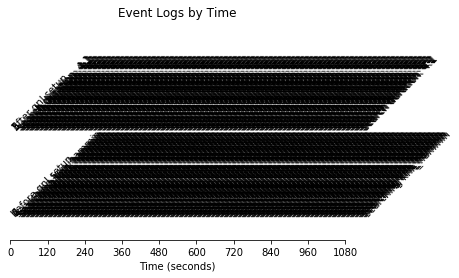

In [6]:
# plot search logs
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

lim = len(t_seconds)
mult = 5
#Max = t_seconds[lim*mult]
Max = t_seconds[len(t_seconds)-1]
interval = Max/10 + 10 - (Max/10)%10

def addtext(i,time, log, ax, props):
    if i%2 == 0:
        ax.text(time, 0.1, log, props, rotation=45)
    else:
        ax.text(time, 0.5, log, props, rotation=45)
    ax.grid(False)

fig, ax = plt.subplots() #figsize=(20,5))

for i in range(lim):
    addtext(i,t_seconds[i], logs[i], ax, {'ha': 'left', 'va': 'bottom'})

ax.set_xticks(np.arange(0, Max, interval), [])
ax.set_xlabel('Time (seconds)')

## begone the right, left, top and bottom spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([], [])
ax.set_yticklabels([])
plt.title('Event Logs by Time')
f = plt.show

In [7]:
# Parse the power log file
troxel_test_file = os.path.join( troxel_exp_dir, '2 E36313A 192.168.10.10.CSV' )
troxel_data = pd.read_csv(troxel_test_file) 
troxel_data = troxel_data.iloc[8:]
troxel_data.rename(columns={"Address": "Time (s)", "TCPIP0::192.168.10.10::5025::SOCKET": "I2 (DC Current)", "Unnamed: 2": "V2 (DC Volt)"}, inplace = True)
troxel_data.head(10)

,Time (s),I2 (DC Current),V2 (DC Volt)
8,2019-11-24 16:16:37.534,-5E-06,0.002383
9,2019-11-24 16:16:38.277,-5E-06,0.002383
10,2019-11-24 16:16:38.713,-4E-06,0.002383
11,2019-11-24 16:16:39.169,-3E-06,0.002383
12,2019-11-24 16:16:39.625,-6E-06,0.002383
13,2019-11-24 16:16:40.082,-5E-06,0.002383
14,2019-11-24 16:16:40.536,-4E-06,0.002383
15,2019-11-24 16:16:41.026,-5E-06,0.002383
16,2019-11-24 16:16:41.528,-5E-06,0.002383
17,2019-11-24 16:16:42.026,-4E-06,0.002383


In [8]:
# match time stamps across experiments
gsi_pc_ts = "Sun Nov 24 17:56:19 IST 2019"
troxel_ts = "2019-11-24 09:56:24.037937"

troxel_time_obj = datetime.datetime.strptime(troxel_ts, '%Y-%m-%d %H:%M:%S.%f')

# re-orient fields in gsi ts
parts = gsi_pc_ts.split()
print(parts)
#day = ["Sun","Mon","Tue","Wed","Thurs","Fri","Sat"].indexof(parts[0])
month = [ "none", "Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec" ].index( parts[1])
new_ts = "%s-%s-%s %s" % ( parts[-1], month, parts[2], parts[3] )
print(new_ts)

gsi_time_obj = datetime.datetime.strptime(new_ts, '%Y-%m-%d %H:%M:%S')

diff_time = gsi_time_obj - troxel_time_obj
print(diff_time)

['Sun', 'Nov', '24', '17:56:19', 'IST', '2019']
2019-11-24 17:56:19
7:59:54.962063


In [9]:
# adjust all logs relative to GSI time...

# get the troxel data as list

#troxel_data["Time (s)","test"]
print(troxel_data.columns)
orig_date_col = troxel_data["Time (s)"]
print(type(orig_date_col))
shape = orig_date_col.shape
print(shape[0])
ts = []
dt_list = list( orig_date_col )
#dt_list[0]
for i in range(shape[0]):
    dtobj = datetime.datetime.strptime( dt_list[i], '%Y-%m-%d %H:%M:%S.%f')
    dtobj = dtobj + diff_time
    ts.append(dtobj)
#print(ts)
troxel_data["newts"] = ts
troxel_data.head(10)

Index(['Time (s)', 'I2 (DC Current)', 'V2 (DC Volt)'], dtype='object')
<class 'pandas.core.series.Series'>
4362


,Time (s),I2 (DC Current),V2 (DC Volt),newts
8,2019-11-24 16:16:37.534,-5E-06,0.002383,2019-11-25 00:16:32.496063
9,2019-11-24 16:16:38.277,-5E-06,0.002383,2019-11-25 00:16:33.239063
10,2019-11-24 16:16:38.713,-4E-06,0.002383,2019-11-25 00:16:33.675063
11,2019-11-24 16:16:39.169,-3E-06,0.002383,2019-11-25 00:16:34.131063
12,2019-11-24 16:16:39.625,-6E-06,0.002383,2019-11-25 00:16:34.587063
13,2019-11-24 16:16:40.082,-5E-06,0.002383,2019-11-25 00:16:35.044063
14,2019-11-24 16:16:40.536,-4E-06,0.002383,2019-11-25 00:16:35.498063
15,2019-11-24 16:16:41.026,-5E-06,0.002383,2019-11-25 00:16:35.988063
16,2019-11-24 16:16:41.528,-5E-06,0.002383,2019-11-25 00:16:36.490063
17,2019-11-24 16:16:42.026,-4E-06,0.002383,2019-11-25 00:16:36.988063


In [10]:
# plot search logs
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

gsi_ts = list(df[0])
print(type(gsi_ts[0]),gsi_ts[0], len(gsi_ts))

logs = list(df[3])
print( type(logs[0]), logs[0], len(logs))

logs_marker = [ ]
for log in logs:
    if log.find("knn_hamming")>=0:
        logs_marker.append(0)
    elif log.find("duration")>=0:
        logs_marker.append(1)
#    elif log.find("gnl")>=0:
#        print("log==",log)
#        logs_marker.append("-1")
    else:
        print("log==",log)
        logs_marker.append(-1)

print(troxel_data.columns)
troxel_ts = list(troxel_data["newts"])
print( type(troxel_ts[0]), troxel_ts[0], len(troxel_ts))

voltages = list(troxel_data["V2 (DC Volt)"])
print( type(voltages[0]), voltages[0], len(voltages))
voltages = [ float(v) for v in voltages ]

current = list(troxel_data["I2 (DC Current)"])
current = [ float(c) for c in current ]
print( type(current[0]), current[0], len(current))


<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2019-11-25 00:17:32.580188 551
<class 'str'> before gnl setup 551
log== before gnl setup
log== 1
log== 2
log== 3
log== 4
log== 5
log== 6
log== after gnl setup
Index(['Time (s)', 'I2 (DC Current)', 'V2 (DC Volt)', 'newts'], dtype='object')
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2019-11-25 00:16:32.496063 4362
<class 'str'> 0.002383 4362
<class 'float'> -5e-06 4362


Figure(1500x500) [<matplotlib.axes._subplots.AxesSubplot object at 0x11f05e990>


/Users/gwilliams/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


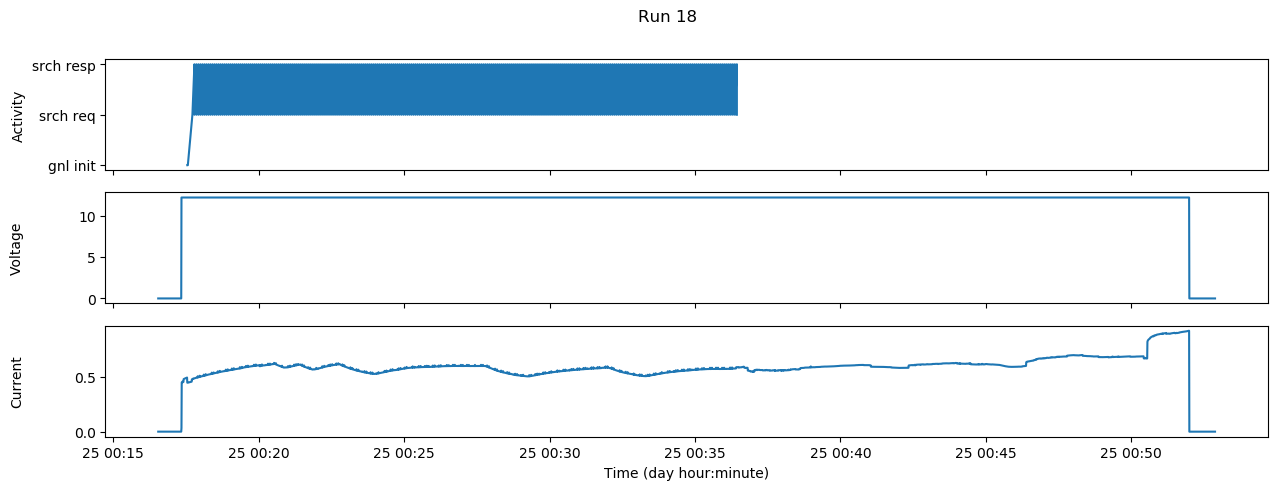

In [11]:
FSIZE = (15,5)

fig, axes = plt.subplots(3,1, sharex = True, figsize=FSIZE,dpi=100) 
print(fig, axes)

axes[0].set_yticks([-1,0,1])
axes[0].set_yticklabels(["gnl init","srch req", "srch resp"])

axes[2].set_xlabel("Time (day hour:minute)")

axes[0].set_ylabel("Activity")
axes[1].set_ylabel("Voltage",x=-10)
axes[2].set_ylabel("Current")

axes[0].plot(gsi_ts, logs_marker)
axes[1].plot(troxel_ts, voltages)
axes[2].plot(troxel_ts, current)

#10
#axes[1].yaxis.set_label_coords(-0.103,0.5)
#axes[2].yaxis.set_label_coords(-0.103,0.5)

#15
axes[1].yaxis.set_label_coords(-0.07,0.5)
axes[2].yaxis.set_label_coords(-0.07,0.5)

fig.suptitle(fname)
fig.savefig("%s.jpg" % fname,dpi=100,quality=100)